In [105]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [106]:
df = pd.DataFrame(columns=["k", "x0", "x1", "d0", "d1", "d_norm", "alpha", "f_val"])

In [107]:
def f(x):
    return 5 * x[0]**2 + x[1]**2 + 4 * x[0] * x[1] - 14 * x[0] - 6 * x[1] + 20

def grad_f(x):
    df_dx1 = 10 * x[0] + 4 * x[1] - 14
    df_dx2 = 2 * x[1] + 4 * x[0] - 6
    return np.array([df_dx1, df_dx2])

def steepest_descent(x, max_iter=40, tol=1e-6, alpha=0.0866):
    x = x
    iteration = 0

    while iteration < max_iter:
        gradient = grad_f(x)

        d_norm = np.sqrt((gradient[0]**2 + gradient[1]**2))
        new_row = [iteration, x[0], x[1], gradient[0], gradient[1], d_norm, alpha, f(x)]
        df.loc[len(df.index)] = new_row

        if np.linalg.norm(gradient) < tol:
            break

        iteration += 1
        # update alpha
        nominator = gradient[0]**2 + gradient[1]**2
        denominator = 5*gradient[0]**2 + gradient[1]**2 + 4*gradient[0]*gradient[1]
        alpha = nominator / (2 * denominator)

        x = x - alpha * gradient

    return x, f(x)

In [108]:
# Initial guess
x = np.array([0.0, 10.0])

# Run steepest descent algorithm
result, minimum_value = steepest_descent(x)

print("Optimal solution:", result)
print("Minimum value:", minimum_value)

Optimal solution: [0.99999939 1.00000145]
Minimum value: 10.000000000000425


In [109]:
df[:50]

,k,x0,x1,d0,d1,d_norm,alpha,f_val
0,0.0,0.000000,10.000000,2.600000e+01,1.400000e+01,2.952965e+01,0.086600,60.000000
1,1.0,-2.252782,8.786963,-1.379968e+00,2.562798e+00,2.910712e+00,0.086645,22.222576
2,2.0,0.755548,3.200064,6.355739e+00,3.422321e+00,7.218567e+00,2.180000,12.987827
3,3.0,0.204852,2.903535,-3.373353e-01,6.264799e-01,7.115280e-01,0.086645,10.730379
4,4.0,0.940243,1.537809,1.553670e+00,8.365916e-01,1.764590e+00,2.180000,10.178542
5,5.0,0.805625,1.465322,-8.246213e-02,1.531439e-01,1.739341e-01,0.086645,10.043645
6,6.0,0.985392,1.131468,3.797970e-01,2.045061e-01,4.313566e-01,2.180000,10.010669
7,7.0,0.952485,1.113749,-2.015799e-02,3.743627e-02,4.251845e-02,0.086645,10.002608
8,8.0,0.996429,1.032138,9.284195e-02,4.999182e-02,1.054458e-01,2.180000,10.000638
9,9.0,0.988385,1.027806,-4.927651e-03,9.151353e-03,1.039370e-02,0.086645,10.000156


### generate figures 

In [110]:
def f(x, y):
    return 5 * x**2 + y**2 + 4 * x * y - 14 * x - 6 * y + 20

x = np.linspace(-6, 6, 20)
y = np.linspace(-6, 6, 20)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

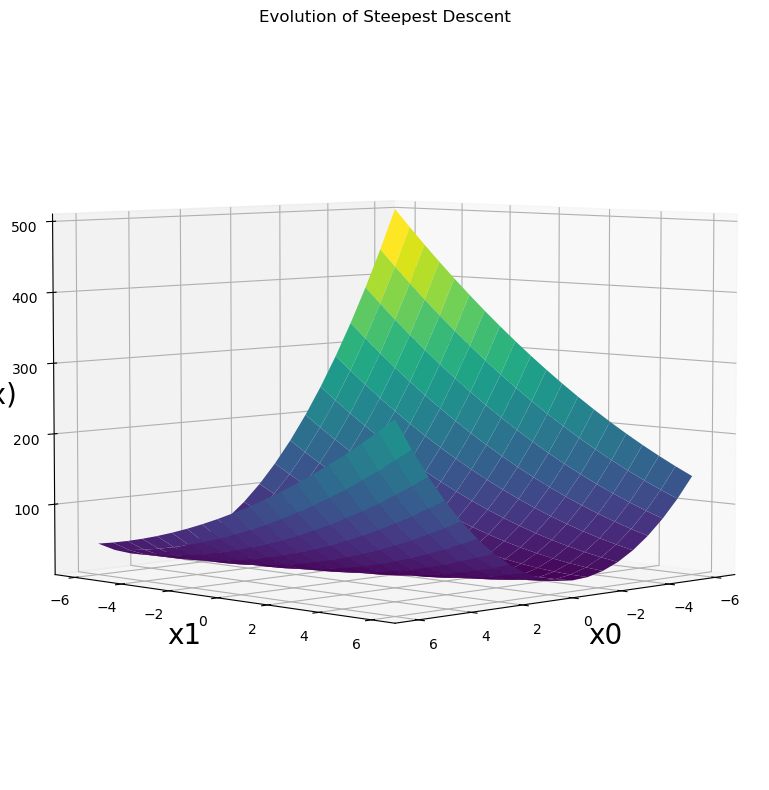

In [111]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(elev=5, azim=45)
ax.set_xlabel('x0', fontsize=20)
ax.set_ylabel('x1', fontsize=20)
ax.set_zlabel('f(x)', fontsize=20)

plt.title("Evolution of Steepest Descent")
plt.tight_layout()
plt.savefig('./surface-7.pdf')

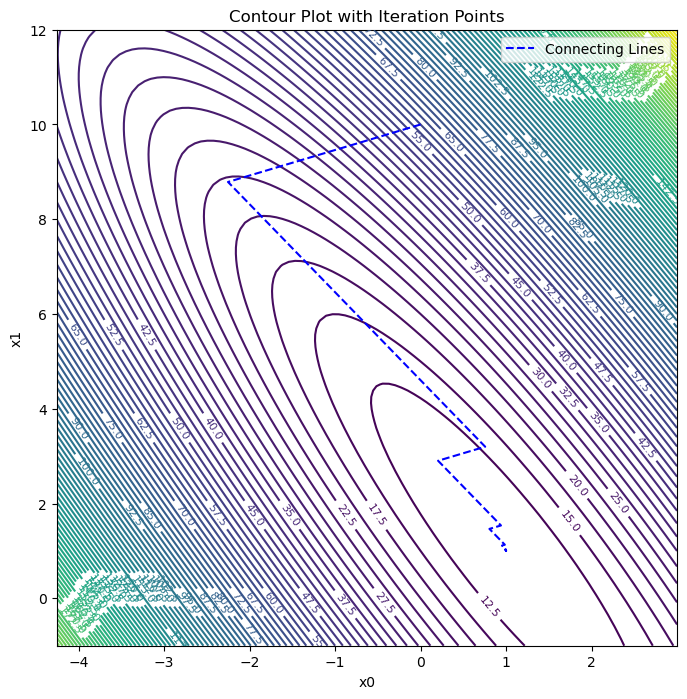

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your function definition
def f(x):
    return 5 * x[0]**2 + x[1]**2 + 4 * x[0] * x[1] - 14 * x[0] - 6 * x[1] + 20

# Assuming you have the DataFrame df with iteration data
# df = pd.DataFrame(columns=["k", "x0", "x1", "d0", "d1", "d_norm", "alpha", "f_val"])

# Extract x0 and x1 values from the DataFrame
x0_values = df["x0"].values
x1_values = df["x1"].values

# Plot contour graph
x0_range = np.linspace(min(x0_values) - 2, max(x0_values) + 2, 100)
x1_range = np.linspace(min(x1_values) - 2, max(x1_values) + 2, 100)
X0, X1 = np.meshgrid(x0_range, x1_range)
Z = f([X0, X1])

plt.figure(figsize=(8, 8))
contour = plt.contour(X0, X1, Z, levels=100, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Plot points and connect with lines
# plt.scatter(x0_values, x1_values, c='red', label='Iterations')
plt.plot(x0_values, x1_values, '--', c='blue', label='Connecting Lines')

plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Contour Plot with Iteration Points')
plt.legend()
plt.savefig("./evolution.pdf")
plt.show()

In [102]:
x0_values, x1_values

(array([-2.2516    , -2.13327695,  0.26690804,  1.18283667, -3.33465454,
         0.99999374,  0.99999392,  1.        ,  1.        ]),
 array([ 8.7876    ,  8.56502512,  2.75415308,  1.07580032, -0.79545445,
         1.00001511,  1.00001467,  1.        ,  1.        ]))